In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("survey_results_public.csv")

In [124]:
df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


In [125]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly" ]]

df = df.rename({"ConvertedCompYearly" : "Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [126]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [128]:
df.shape

(46844, 5)

In [129]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [130]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [131]:
df["Country"].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [132]:
def shorten_catagories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
            
        else:
            categorical_map[categories.index[i]] = 'Other'
            
    return categorical_map

In [133]:
country_map = shorten_catagories(df.Country.value_counts(), 400)

df["Country"] = df["Country"].map(country_map)

df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

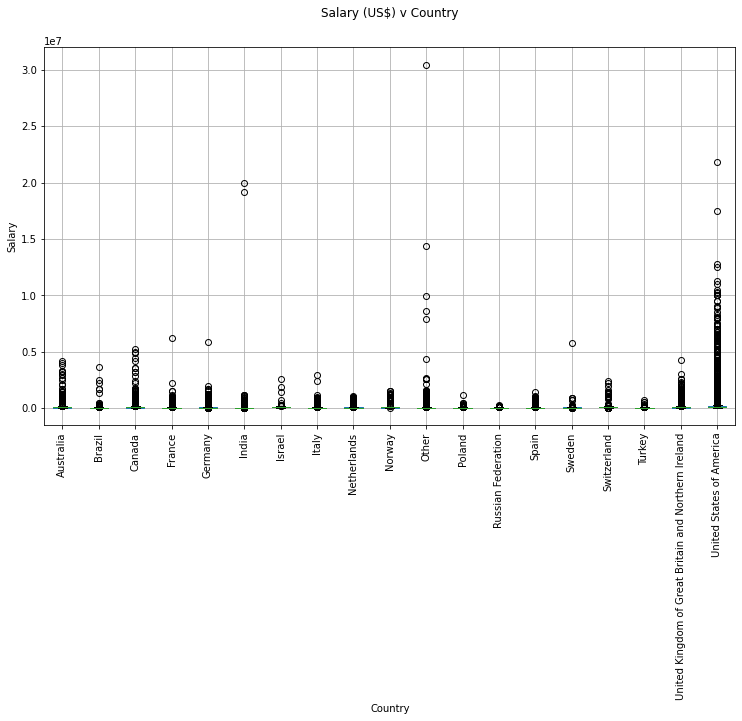

In [134]:
fix, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle('Salary (US$) v Country')

plt.title(" ")
plt.ylabel("Salary")
plt.xticks(rotation = 90)

plt.show()

In [135]:
df = df[df["Salary"] <= 250000]

df = df[df["Salary"] >= 10000]

df = df[df["Country"] != 'Others']

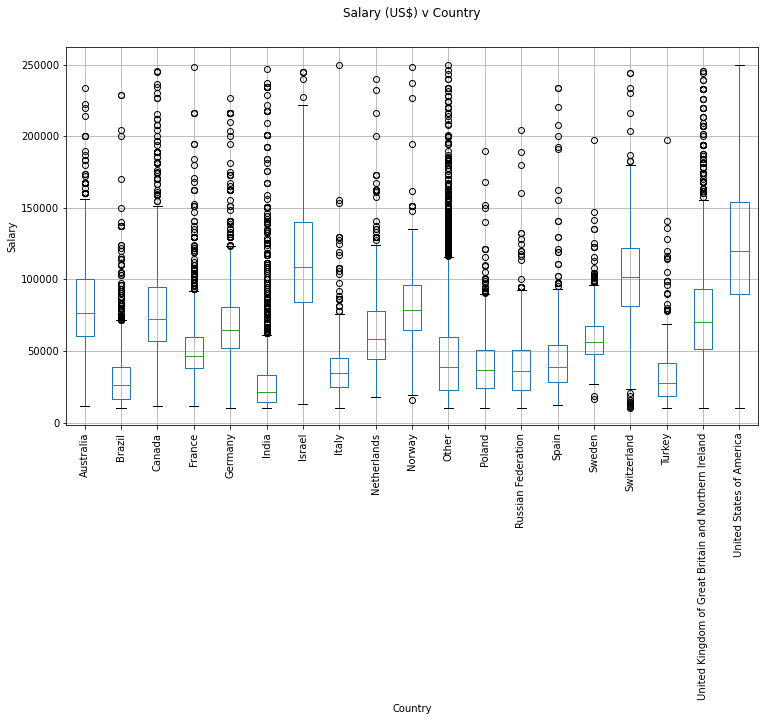

In [136]:
fix, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle('Salary (US$) v Country')

plt.title(" ")
plt.ylabel("Salary")
plt.xticks(rotation = 90)

plt.show()

In [137]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '1', '12', '8', '17', '14', '26', '34', '11', '25',
       '24', '7', '22', '13', '9', '20', '23', '39', '27', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [138]:
def clean_experi(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experi)

In [139]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [140]:
def clean_edu(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    
    if "Master’s degree" in x:
        return "Master’s degree"
    
    if "Professional degree" or "Other doctoral" in x:
        return "Post Grad"
    
    return "Less than a Bachelors"

In [141]:
df["EdLevel"] = df['EdLevel'].apply(clean_edu)

In [142]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post Grad'], dtype=object)

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le_edu = LabelEncoder()

df["EdLevel"] = le_edu.fit_transform(df['EdLevel'])

df["EdLevel"].unique()

array([1, 0, 2])

In [145]:
le_country = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"])

df["Country"].unique()

array([14, 13,  4, 16,  2,  3, 15, 17, 12,  6, 10, 18,  1,  7,  8, 11,  0,
        5,  9])

In [146]:
x = df.drop("Salary", axis = 1)

y = df["Salary"]

In [147]:
from sklearn.linear_model import LinearRegression
li_reg = LinearRegression()
li_reg.fit(x, y.values)

LinearRegression()

In [148]:
y_pred = li_reg.predict(x)

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [150]:
import numpy as np

In [151]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [152]:
error

40794.70501331646

In [153]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)
# dec_tree_reg.get_params()

DecisionTreeRegressor(random_state=0)

In [154]:
y_pred = dec_tree_reg.predict(x)

In [155]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [156]:
print("${:,.02f}".format(error))

$30,636.40


In [157]:
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor(random_state=0)
ran_for_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [158]:
y_pred = ran_for_reg.predict(x)

In [159]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,672.55


In [160]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10, 12]
parameters = {"max_depth" : max_depth}

regg = DecisionTreeRegressor(random_state=0)

gs = GridSearchCV(regg, parameters, scoring="neg_mean_squared_error")

gs.fit(x, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [161]:
regressor = gs.best_estimator_

In [162]:
regressor.fit(x, y.values)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [163]:
y_pred = regressor.predict(x)

In [164]:
error = np.sqrt(mean_squared_error(y, y_pred))

print("${:,.02f}".format(error))

$31,220.00


In [165]:
x

,Country,EdLevel,YearsCodePro
9,14,1,4.0
11,13,0,5.0
12,4,1,6.0
16,16,0,2.0
17,2,0,6.0
...,...,...,...
83430,18,1,21.0
83432,2,0,0.5
83434,18,0,5.0
83436,18,2,4.0


In [166]:
x = np.array([["United States of America", "Master’s degree", 18]])

In [167]:
x

array([['United States of America', 'Master’s degree', '18']],
      dtype='<U24')

In [168]:
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_edu.transform(x[:, 1])

x = x.astype(float)
x

array([[18.,  1., 18.]])

In [169]:
y_pred = regressor.predict(x)

In [170]:
y_pred

array([152091.31034483])

In [171]:
import pickle

In [172]:
data = {"model" : regressor, "le_country" : le_country, "le_education": le_edu}

with open("saved_steps.pkl", 'wb') as file:
    pickle.dump(data, file)

In [173]:
with open("saved_steps.pkl", 'rb') as file:
    data = pickle.load(file)
    
reg_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]


In [174]:
y_pred = reg_loaded.predict(x)

In [175]:
y_pred

array([152091.31034483])